# Dec ??th, 2022 (SLC: Saba plot)

**Motivation**: make a self contained notebook for Saba to plot stuff <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

In [2]:
mice = Mice(128)

In [3]:
from bg_atlasapi import BrainGlobeAtlas, show_atlases

In [4]:
zf_mpin = BrainGlobeAtlas('mpin_zfish_1um')
zf_azba = BrainGlobeAtlas('azba_zfish_4um')

princeton = BrainGlobeAtlas('princeton_mouse_20um')
admba_e18 = BrainGlobeAtlas('admba_3d_e18_5_mouse_16um')
admba_p56 = BrainGlobeAtlas('admba_3d_p56_mouse_25um')
osten = BrainGlobeAtlas('osten_mouse_100um')
kim = BrainGlobeAtlas('kim_mouse_100um')

In [5]:
show_atlases()

╭───────────────────────────────── Brainglobe Atlases ─────────────────────────────────╮
│  Name                              Downloaded  Updated  Local version     Latest     │
│                                                                          version     │
│  osten_mouse_100um                     ✔          ✔          1.1           1.1       │
│  allen_mouse_25um                      ✔          ✔          1.2           1.2       │
│  mpin_zfish_1um                        ✔          ✔          1.0           1.0       │
│  allen_mouse_10um                      ✔          ✔          1.2           1.2       │
│  allen_mouse_100um                     ✔          ✔          1.2           1.2       │
│  admba_3d_e18_5_mouse_16um             ✔          ✔          1.0           1.0       │
│  azba_zfish_4um                        ✔          ✔          1.1           1.1       │
│  allen_mouse_50um                      ✔          ✔          1.2           1.2       │
│  admba_3d_p56_mouse_25um               ✔          ✔          1.0           1.0       │
│  kim_mouse_100um                       ✔          ✔          1.0           1.0       │
│  allen_human_500um                     ✔          ✔          0.1           0.1       │
│  princeton_mouse_20um                  ✔          ✔          1.0           1.0       │
│  example_mouse_100um                   ✔          ✔          1.2           1.2       │
│  kim_mouse_10um                                                            1.0       │
│  kim_mouse_25um                                                            1.0       │
│  kim_mouse_50um                                                            1.0       │
│  osten_mouse_10um                                                          1.1       │
│  osten_mouse_25um                                                          1.1       │
│  osten_mouse_50um                                                          1.1       │
│  allen_cord_20um                                                           1.0       │
│  whs_sd_rat_39um                                                           1.0       │
│  perens_lsfm_mouse_20um                                                    1.0       │
│  admba_3d_e11_5_mouse_16um                                                 1.0       │
│  admba_3d_e13_5_mouse_16um                                                 1.0       │
│  admba_3d_e15_5_mouse_16um                                                 1.0       │
│  admba_3d_p4_mouse_16.752um                                                1.0       │
│  admba_3d_p14_mouse_16.752um                                               1.0       │
│  admba_3d_p28_mouse_16.752um                                               1.0       │
╰──────────────────────────────────────────────────────────────────────────────────────╯

In [15]:
zf_azba.annotation.shape, zf_mpin.annotation.shape

((1224, 470, 670), (974, 359, 597))

<matplotlib.image.AxesImage object at 0x7fc42db9a670>

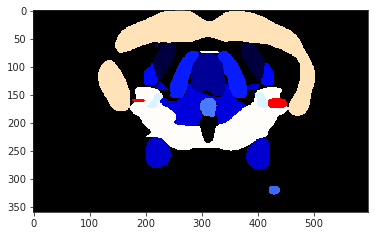

In [31]:
plt.imshow(zf_mpin.annotation[550], cmap='flag_r')

<matplotlib.image.AxesImage object at 0x7fc42e01b1c0>

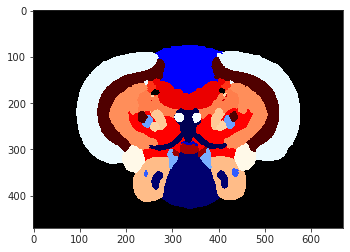

In [19]:
plt.imshow(zf_azba.annotation[500], cmap='flag_r')

In [33]:
princeton.annotation.shape

(640, 352, 540)

<matplotlib.image.AxesImage object at 0x7fc4105f1790>

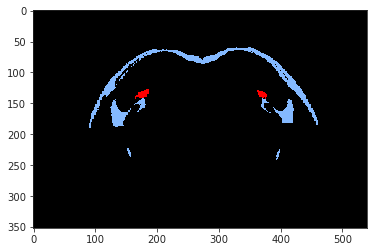

In [46]:

plt.imshow(princeton.annotation[300], cmap='flag_r')

<matplotlib.image.AxesImage object at 0x7fc4105bb7f0>

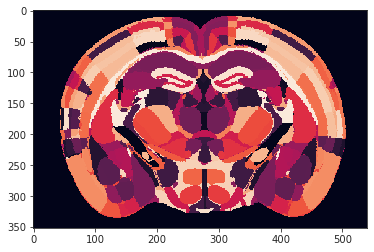

In [49]:
x = princeton.annotation[300].copy()
for i, r in enumerate(np.unique(x[x.nonzero()])):
    x[x == r] = i + 1
plt.imshow(x)

<matplotlib.image.AxesImage object at 0x7fc3f889f5b0>

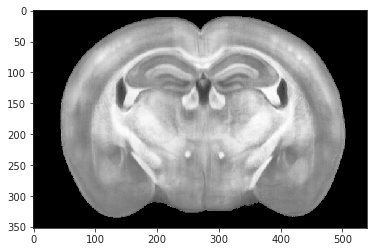

In [68]:
plt.imshow(princeton.reference[300], cmap='Greys_r')

In [97]:
admba_p56.reference.shape

(528, 320, 456)

<matplotlib.image.AxesImage object at 0x7fc3d94d7af0>

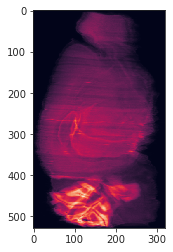

In [101]:
plt.imshow(admba_p56.reference.mean(2))

<matplotlib.image.AxesImage object at 0x7fc3d92b3250>

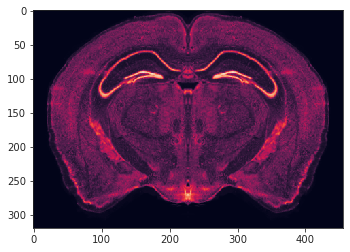

In [107]:
plt.imshow(admba_p56.reference[300])

In [109]:
kim

╭──────────────────────────────────────────────────────────────────╮
│                         Kim mouse 100um                          │
│                                                                  │
│         name:  kim_mouse (v1.0)                                  │
│      species:  Mus musculus                                      │
│     citation:  Chon et al. 2019                                  │
│                https://doi.org/10.1038/s41467-019-13057-w        │
│         link:  https://kimlab.io/brain-map/atlas/                │
│                                                                  │
│  orientation:  asr                                               │
│    symmetric:  True                                              │
│   resolution:  [100.0, 100.0, 100.0]                             │
│        shape:  [132, 80, 114]                                    │
╰──────────────────────────────────────────────────────────────────╯

In [53]:
allen = BrainGlobeAtlas('allen_mouse_100um')

<matplotlib.image.AxesImage object at 0x7fc3f83479d0>

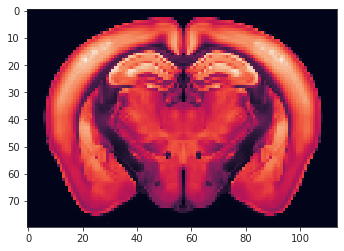

In [82]:
plt.imshow(allen.reference[70])

In [36]:
xx = 'Symmetric_N162_space-indiv3d_cortex.nii.gz'
xx = ants.image_read(xx, pixeltype='unsigned int').numpy()
x = np.unique(xx[xx.nonzero()])
len(x)

2604

In [37]:
x

array([   1,    2,    3, ..., 3062, 3064, 3067], dtype=uint32)

In [38]:
pd.DataFrame({'id': x}).to_csv('cortex.csv')

<matplotlib.image.AxesImage object at 0x7f8997ac2a90>

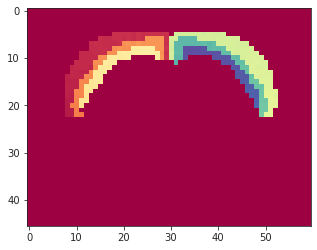

In [40]:
plt.imshow(xx[:, :, 50].T, cmap='Spectral')

In [41]:
xx = 'Symmetric_N162_space-indiv3d_subcortex-l.nii.gz'
xx = ants.image_read(xx, pixeltype='unsigned int').numpy()
x = np.unique(xx[xx.nonzero()])
len(x)

153

In [42]:
x

array([    7,    15,    27,    56,    59,    63,    64,    88,    91,
          96,   101,   105,   114,   122,   127,   131,   141,   149,
         155,   157,   159,   170,   178,   181,   186,   188,   196,
         204,   210,   218,   250,   255,   258,   260,   262,   266,
         278,   290,   298,   303,   310,   311,   319,   323,   325,
         333,   339,   340,   342,   348,   349,   362,   366,   370,
         382,   414,   422,   429,   437,   445,   451,   463,   475,
         483,   491,   502,   507,   513,   515,   525,   538,   539,
         557,   564,   566,   572,   575,   579,   581,   583,   587,
         589,   595,   596,   599,   609,   612,   629,   632,   639,
         642,   647,   651,   672,   685,   693,   711,   718,   725,
         733,   741,   754,   780,   788,   809,   814,   843,   846,
         867,   903,   907,   918,   920,   926,   928,   930,   936,
         942,   944,   946,   951,   957,   961,   968,   980,   987,
         989,   998,  1004,  1007,  1017,  1020,  1022,  1025,  1029,
        1031,  1033,  1037,  1041,  1049,  1077,  1084,  1113,  1117,
        1181,  1190,  1340,  1348,  1384,  1468,  1477, 10703, 10704],
      dtype=uint32)

In [43]:
pd.DataFrame({'id': x}).to_csv('subcortex.csv')

<matplotlib.image.AxesImage object at 0x7f89978dbee0>

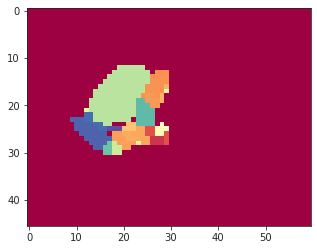

In [44]:
plt.imshow(xx[:, :, 50].T, cmap='Spectral')

In [11]:
pd.DataFrame({'id': cortex}).to_csv('cortex.csv')
pd.DataFrame({'id': subcortex}).to_csv('subcortex.csv')

In [8]:
subcortex

array([    7,    15,    27,    56,    59,    63,    64,    88,    91,
          96,   101,   105,   114,   122,   127,   131,   141,   149,
         155,   157,   159,   170,   178,   181,   186,   188,   196,
         204,   210,   218,   250,   255,   258,   260,   262,   266,
         278,   290,   298,   303,   310,   311,   319,   323,   325,
         333,   339,   340,   342,   348,   349,   362,   365,   366,
         370,   382,   414,   422,   423,   429,   437,   445,   451,
         463,   475,   483,   491,   502,   507,   513,   515,   525,
         538,   539,   557,   564,   566,   572,   575,   579,   581,
         583,   587,   589,   595,   596,   599,   609,   612,   629,
         632,   639,   642,   647,   651,   672,   685,   693,   711,
         718,   725,   733,   741,   754,   780,   788,   809,   814,
         843,   846,   867,   903,   907,   918,   920,   926,   928,
         930,   936,   942,   944,   946,   951,   957,   961,   968,
         980,   987,   989,   998,  1004,  1007,  1017,  1020,  1022,
        1025,  1029,  1031,  1033,  1037,  1041,  1049,  1077,  1084,
        1113,  1117,  1181,  1190,  1340,  1348,  1384,  1468,  1477,
       10703, 10704], dtype=uint32)

In [16]:
mice.al.get(572)

{
    'acronym': 'ACA1',
    'graph_id': 1,
    'graph_order': 221,
    'id': 572,
    'name': 'Anterior cingulate area, layer 1',
    'structure_id_path': [997, 8, 567, 688, 695, 315, 31, 572],
    'structure_set_ids': [],
    'rgb_triplet': [64, 166, 102]
}

In [9]:
m = mice.parcel['subcortex'] == 572

<matplotlib.image.AxesImage object at 0x7f47a401d370>

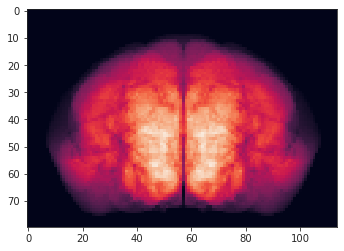

In [14]:
plt.imshow((mice.parcel['subcortex'] != 0).mean(0))

<matplotlib.image.AxesImage object at 0x7f47a464da60>

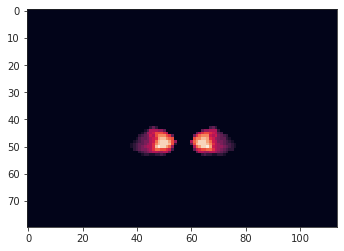

In [13]:
plt.imshow(m.mean(0))

In [2]:
# path = '/home/hadi/Downloads/ca_average'
# x = np.load(pjoin(path, 'sub_SLC06ca_rest.npy'))

In [8]:
x.shape

(540, 110)

In [9]:
len(lookup['ca2'])

540

## Start (node2area)

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(tmp_dir, 'Saba', '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

In [11]:
roi = 'roi_lookup.npy'
roi = np.load(pjoin(tmp_dir, 'Saba', roi), allow_pickle=True).item()
list(roi)

['ca2', 'bold']

In [12]:
len(roi['bold']), len(roi['ca2'])

(3068, 540)

In [13]:
ctx = 'cortex_100um.npy'
ctx = np.load(pjoin(tmp_dir, 'Saba', ctx))
ctx.shape

(132, 80, 114)

In [14]:
regions = unique_idxs(ctx)
len(regions)

3066

In [15]:
mice = Mice(512)
# mice.node_lookup = roi
bs = Base(mice, mode='ca2')

In [16]:
len(mice.node_lookup['bold']), len(mice.node_lookup['ca2'])

(3068, 540)

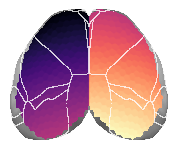

In [17]:
_ = bs.show(
    np.array([e + 1 for e in mice.node_lookup['ca2']]),
    vmin=1, vmax=len(mice.node_lookup['ca2'])
)

In [18]:
x = 'statistic_BOLD.npy'
x = np.load(pjoin(tmp_dir, x))
x.shape

(3068,)

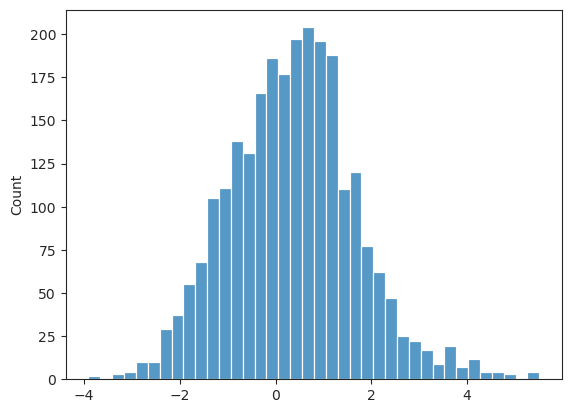

In [19]:
sns.histplot(x)
plt.show()

In [20]:
proj = bs.project_vec(x)
proj = bs.trim2d(proj)
list(proj)

['top', 'proj-top', 'flat', 'proj-flat']

In [21]:
proj['proj-flat'].shape

(1, 1285, 2240)

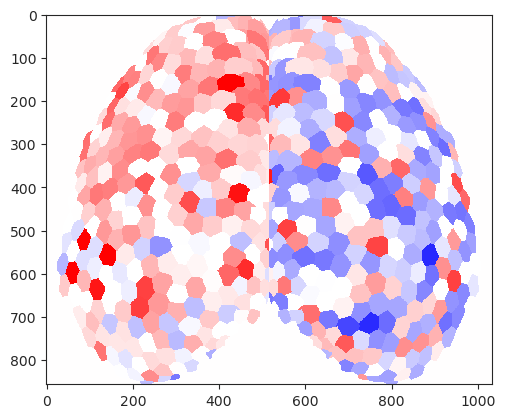

In [22]:
plt.imshow(proj['proj-top'][0], vmin=-4, vmax=4, cmap='bwr')
plt.show()

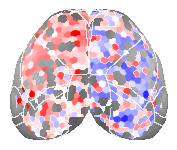

In [23]:
_ = bs.show(x, vmin=-4, vmax=4, cmap='bwr')

In [24]:
x[np.argsort(x)[::-1]][508:520]

array([       nan, 5.51282628, 5.43941441, 5.37518765, 5.29363939,
       5.01232586, 4.95340574, 4.90172445, 4.67507451, 4.65246397,
       4.64917357, 4.57819367])

In [25]:
np.argsort(x)[::-1][509]

1160

In [26]:
list(mice.parcel.results)

[
    'cols',
    'cortex',
    'subcortex',
    'nonzero-idxs_parcel2d-flat',
    'nonzero-idxs_parcel2d-top',
    'nonzero-idxs_parcel3d',
    'region-idxs_parcel2d-flat',
    'region-idxs_parcel2d-top',
    'region-idxs_parcel3d',
    'shape_parcel2d-flat',
    'shape_parcel2d-top',
    'shape_parcel3d'
]

In [27]:
regions = unique_idxs(mice.parcel.results['cortex'])
len(regions)

3066

In [32]:
y = x[mice.get_subset_idxs('surface')]
y.shape

(540,)

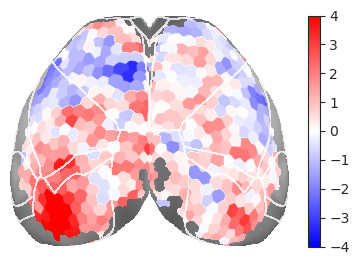

In [36]:
_ = bs.show(y, vmin=-4, vmax=4, cmap='bwr', cbar=True, figsize=(5, 3))

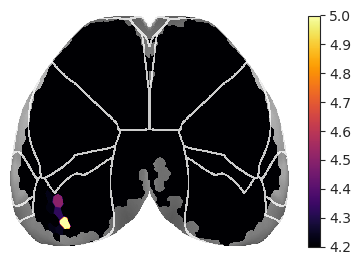

In [73]:
_ = bs.show(y, vmin=4.2, vmax=5, cmap='inferno', cbar=True, figsize=(5, 3))

In [71]:
top5 = np.argsort(y[np.isfinite(y)])[::-1][:5]
top5 = np.where(np.isfinite(y))[0][top5]
y[top5]

array([5.01232586, 4.50415855, 4.32826874, 4.24733346, 4.23377014])

In [72]:
for k, v in n2a['ca2'].items():
    if k in top5:
        print(k, v)

204
(1, 'VISam', 0)

215
(1, 'VISpm', 0)

227
(1, 'RSP', 0)

242
(1, 'VISl', 0)

246
(1, 'RSP', 0)

In [4]:
src = ['Isocortex', 'MO', 'VIS', 'SS', 'SSp']
structs = []
for i in mice.al.get(src)['id']:
    tree, base_lvl = mice.al.get_subtree(
        base_id=i,
        n_levels=2,
        show=False,
    )
    nodes = []
    for n in tree.nodes:
        if tree.level(n) == 1:
            nodes.append(n)
    nodes = mice.al(nodes)['acronym']
    structs.extend(nodes.values.tolist())
structs = [e for e in structs if e not in src]
masks = mice.al.get_masks(structs)
len(masks)

32

In [5]:
mice.parcel.load_parcel(True)
mice.parcel['cols'].shape

(132, 80, 114)

<matplotlib.image.AxesImage object at 0x7fb010f52f10>

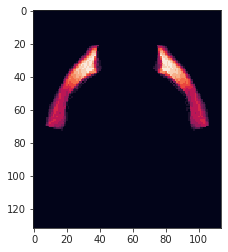

In [13]:
plt.imshow(masks['AI'].mean(1))

In [6]:
%%time

node2area = collections.defaultdict(dict)
for mode, lookup in mice.node_lookup.items():
    for n, lbl in tqdm(lookup.items()):
        i = mice.parcel.encode(lbl)
        max_match = np.argmax([
            overlap_score(m, mice.parcel['cols'] == i)
            for k, m in masks.items()
        ])
        area = list(masks)[max_match]
        try:
            lr, cc, layer = map(lambda s: int(s), lbl.split('-'))
        except ValueError:
            continue
        node2area[mode][n] = (lr, area, layer)
node2area = {
    k: dict(sorted(d.items()))
    for k, d in node2area.items()
}

  0%|          | 0/152 [00:00<?, ?it/s]

  0%|          | 0/1072 [00:00<?, ?it/s]

CPU times: user 3min 34s, sys: 513 ms, total: 3min 35s
Wall time: 3min 34s


In [16]:
_ = save_obj(
    obj=node2area,
    file_name='node2area',
    save_dir=tmp_dir,
    mode='npy',
)

[PROGRESS] 'node2area.npy' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/tmp

In [51]:
n2a = np.load(pjoin('/home/hadi/Dropbox/git/jb-Ca-fMRI/tmp/node2area.npy'), allow_pickle=True).item()
len(n2a['bold'])

2754

In [48]:
n2a['bold'][1160]

(1, 'FRP', 2)

In [50]:
mice.node_lookup['bold'][1160]

'1-414-1'

In [52]:
mice.parcel.encode('1-414-0')

414

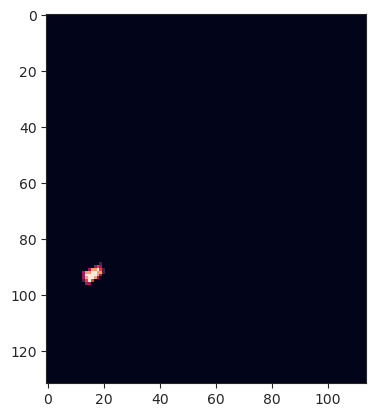

In [54]:
plt.imshow((mice.parcel['cols'] == 414).mean(1))
plt.show()

## Awaiting response ($x \in \mathbb{R}^{3068}$)

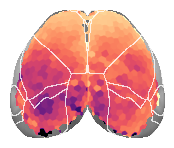

In [38]:
_ = bs.show(x[:, 20], vmin=-100, vmax=0)

<AxesSubplot:ylabel='Count'>

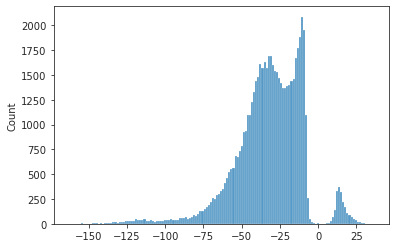

In [33]:
sns.histplot(x.ravel())

## Project

In [77]:
proj = bs.project_vec(x.T, layer=0, add_disjoint=False)
list(proj), proj['top'].shape

(['top', 'flat'], (110, 1320, 1140))

<matplotlib.image.AxesImage object at 0x7fbe633bc100>

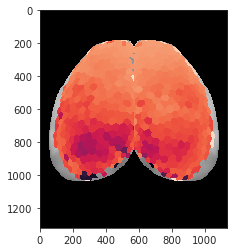

In [81]:
plt.imshow(top, cmap='Greys_r')
plt.imshow(mwh(mask_topview == 0, proj['top'][40]))

In [75]:
parcel_top, parcel_flat = mice.parcel.load_top_flat()
regions = [mice.parcel.encode(r) for r in lookup['ca2'].values()]
mask_topview = np.isin(parcel_top, regions)
np.save('topview_mask.npy', mask_topview)

In [76]:
top, flat = bs.load_top_flat()
np.save('topview.npy', top)

## Do one BOLD example

In [84]:
path = '/home/hadi/Downloads/bold average'
x = np.load(pjoin(path, 'sub_SLC08_bold_rest.npy'))
x.shape

(3068, 11)

In [87]:
subset_idxs = mice.get_subset_idxs('surface')
len(subset_idxs)

540

In [88]:
x = x[subset_idxs]
x.shape

(540, 11)

In [89]:
proj = bs.project_vec(x.T, layer=0, add_disjoint=False)
list(proj), proj['top'].shape

(['top', 'flat'], (11, 1320, 1140))

<matplotlib.image.AxesImage object at 0x7fbd36571760>

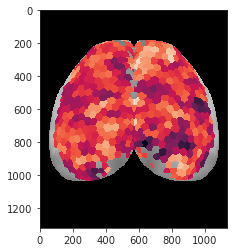

In [98]:
plt.imshow(top, cmap='Greys_r')
plt.imshow(mwh(mask_topview == 0, proj['top'][6]))